### Cleaning and preparing the data for model training

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Problem Statement

A retail company "ABC Private Limited" wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The dataset also contains customer demographics (age, gender, marital state, city_type, stay_in_current_city), product details (product_id and product category) and total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
# importing the dataset
df_train = pd.read_csv('train.csv')
df_train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df_train.shape

(550068, 12)

In [4]:
# importing the dataset
df_test = pd.read_csv('test.csv')
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [5]:
df_test.shape

(233599, 11)

In [6]:
## Merge both train and test data (axis=0)
df = pd.concat([df_train, df_test])
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [7]:
df_train.shape, df_test.shape, df.shape

((550068, 12), (233599, 11), (783667, 12))

In [8]:
df_test.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [9]:
df_train.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [10]:
550068+233599

783667

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [12]:
df.drop(['User_ID'], axis=1, inplace=True)

In [13]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [14]:
pd.get_dummies(df['Gender'])

,F,M
0,True,False
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
233594,True,False
233595,True,False
233596,True,False
233597,True,False


In [15]:
pd.get_dummies(df['Gender'], drop_first=1)

,M
0,False
1,False
2,False
3,False
4,True
...,...
233594,False
233595,False
233596,False
233597,False


In [16]:
df['Gender'] = pd.get_dummies(df['Gender'], drop_first=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [17]:
## Handling categorical feature - Gender
# df['Gender'] = df['Gender'].map({'F': 0, 'M':1})
# df.head()

In [18]:
## Handle categorical feature - Age
df['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [19]:
pd.get_dummies(df['Age'], drop_first=True)   # one-hot encoding

,18-25,26-35,36-45,46-50,51-55,55+
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,True
...,...,...,...,...,...,...
233594,False,True,False,False,False,False
233595,False,True,False,False,False,False
233596,False,True,False,False,False,False
233597,False,False,False,True,False,False


In [20]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [21]:
df['Age'] = df['Age'].map({'0-17': 0, '18-25':1,   # ordinal encoding
                           '26-35':2, '36-45':3, 
                           '46-50':4, '51-55':5, 
                           '55+':6})
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,6,16,C,4+,0,8,NaN,NaN,7969.0


In [22]:
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [23]:
## second technique
from sklearn import preprocessing

# label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

# encode labels in column 'species'
df['Age'] = label_encoder.fit_transform(df['Age'])

df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [24]:
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,False,0,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,False,0,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,False,0,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,False,0,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,True,6,16,C,4+,0,8,NaN,NaN,7969.0


In [25]:
## fixing categorical City-Category
df_city = pd.get_dummies(df['City_Category'], drop_first=True)
df_city.head()

,B,C
0,False,False
1,False,False
2,False,False
3,False,False
4,False,True


In [26]:
df = pd.concat([df, df_city], axis=1)
df.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,A,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,False,0,10,A,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,A,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,False,0,10,A,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,True,6,16,C,4+,0,8,NaN,NaN,7969.0,False,True


In [27]:
## now drop City Category feature
df.drop('City_Category', axis=1, inplace=True)
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,2,0,3,NaN,NaN,8370.0,False,False
1,P00248942,False,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,2,0,12,NaN,NaN,1422.0,False,False
3,P00085442,False,0,10,2,0,12,14.0,NaN,1057.0,False,False
4,P00285442,True,6,16,4+,0,8,NaN,NaN,7969.0,False,True


In [28]:
## missing values
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [29]:
## Focus on replacing missing values
df['Product_Category_2'].unique()

array([nan,  6., 14.,  2.,  8., 15., 16., 11.,  5.,  3.,  4., 12.,  9.,
       10., 17., 13.,  7., 18.])

In [30]:
df['Product_Category_2'].value_counts()

Product_Category_2
8.0     91317
14.0    78834
2.0     70498
16.0    61687
15.0    54114
5.0     37165
4.0     36705
6.0     23575
11.0    20230
17.0    19104
13.0    15054
9.0      8177
12.0     7801
10.0     4420
3.0      4123
18.0     4027
7.0       854
Name: count, dtype: int64

In [31]:
df['Product_Category_2'].mode()[0]

8.0

In [32]:
## Replace the missing values with mode
df['Product_Category_2'] = df['Product_Category_2'].fillna(df['Product_Category_2'].mode()[0])

In [33]:
df['Product_Category_2'].isnull().sum()

0

In [34]:
df.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
B                                  0
C                                  0
dtype: int64

In [35]:
## Product_Category_3 - replace missing values
df['Product_Category_3'] = df['Product_Category_3'].fillna(df['Product_Category_3'].mode()[0])

In [36]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,False,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,False,0,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,True,6,16,4+,0,8,8.0,16.0,7969.0,False,True


In [37]:
df['Product_Category_3'].value_counts()

Product_Category_3
16.0    592278
15.0     39968
14.0     26283
17.0     23818
5.0      23799
8.0      17861
9.0      16532
12.0     13115
13.0      7849
6.0       6888
18.0      6621
4.0       2691
11.0      2585
10.0      2501
3.0        878
Name: count, dtype: int64

In [38]:
df['Product_Category_3'].isnull().sum()

0

In [39]:
df.shape

(783667, 12)

In [40]:
df['Stay_In_Current_City_Years'].unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [41]:
df['Stay_In_Current_City_Years']=df['Stay_In_Current_City_Years'].str.replace('+', '')

In [42]:
df.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,2,0,3,8.0,16.0,8370.0,False,False
1,P00248942,False,0,10,2,0,1,6.0,14.0,15200.0,False,False
2,P00087842,False,0,10,2,0,12,8.0,16.0,1422.0,False,False
3,P00085442,False,0,10,2,0,12,14.0,16.0,1057.0,False,False
4,P00285442,True,6,16,4,0,8,8.0,16.0,7969.0,False,True


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  bool   
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  object 
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(3), float64(3), int64(4), object(2)
memory usage: 62.0+ MB


In [44]:
# convert object into integers
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].astype('int64')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  bool   
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  bool   
 11  C                           783667 non-null  bool   
dtypes: bool(3), float64(3), int64(5), object(1)
memory usage: 62.0+ MB


In [46]:
df['B'] = df['B'].astype('int64')
df['C'] = df['C'].astype('int64')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  bool   
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int64  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
 10  B                           783667 non-null  int64  
 11  C                           783667 non-null  int64  
dtypes: bool(1), float64(3), int64(7), object(1)
memory usage: 72.5+ MB


<Axes: xlabel='Age', ylabel='Purchase'>

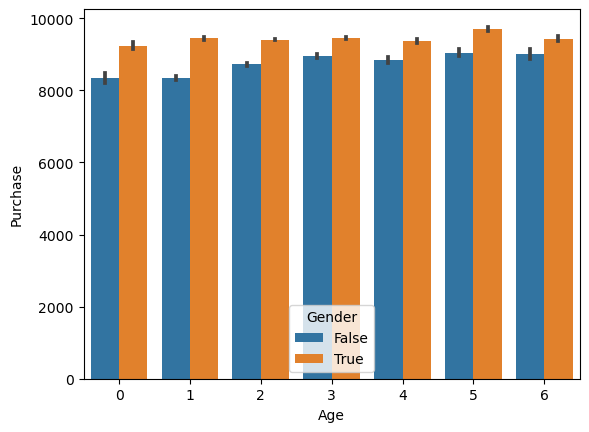

In [48]:
# Visualisation Age vs Purchased
sns.barplot(x='Age', y='Purchase', hue='Gender', data=df)

Purchase by men is higher than women

<Axes: xlabel='Occupation', ylabel='Purchase'>

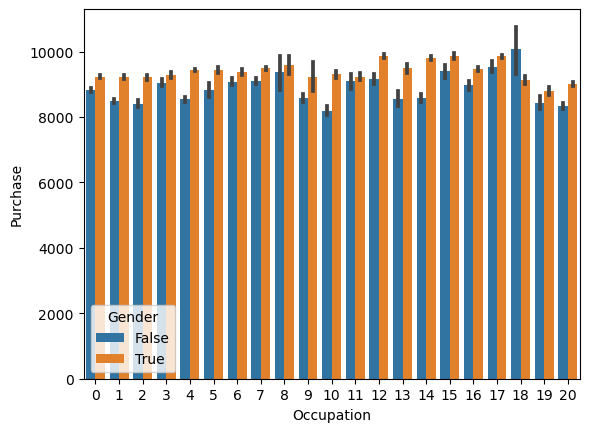

In [49]:
## Visualization of Purchase with occupation
sns.barplot(data=df, x='Occupation', y='Purchase', hue='Gender')

<Axes: xlabel='Product_Category_1', ylabel='Purchase'>

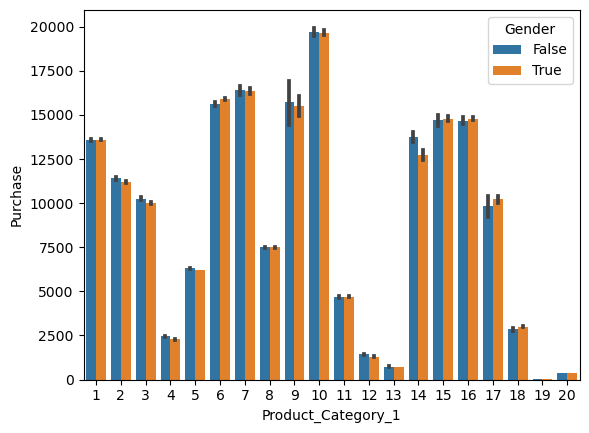

In [50]:
sns.barplot(x='Product_Category_1', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_2', ylabel='Purchase'>

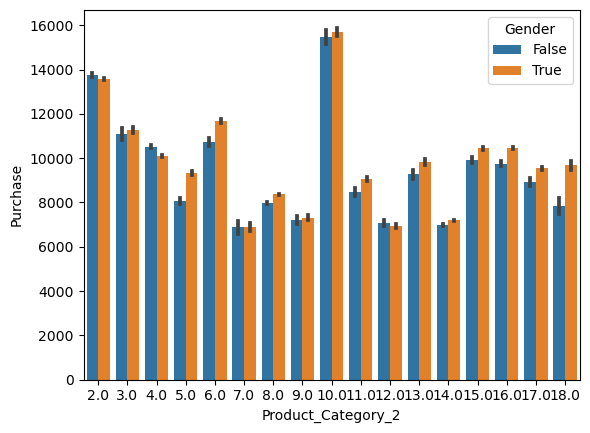

In [51]:
sns.barplot(x='Product_Category_2', y='Purchase', hue='Gender', data=df)

<Axes: xlabel='Product_Category_3', ylabel='Purchase'>

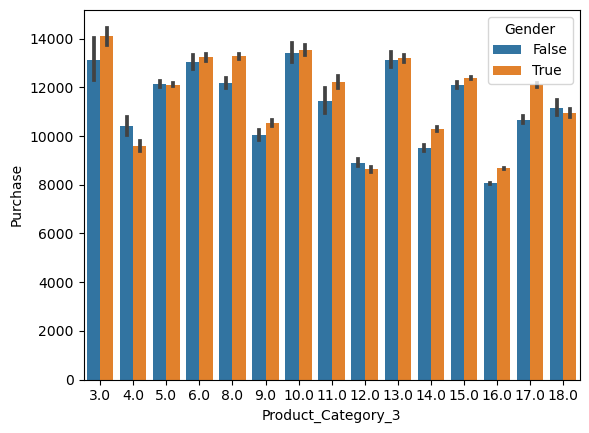

In [52]:
sns.barplot(x='Product_Category_3', y='Purchase', hue='Gender', data=df)

In [53]:
## Feature Scaling
df_test = df[df['Purchase'].isnull()]
df_test.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00128942,True,4,7,2,1,1,11.0,16.0,NaN,1,0
1,P00113442,True,2,17,0,0,3,5.0,16.0,NaN,0,1
2,P00288442,False,3,1,4,1,5,14.0,16.0,NaN,1,0
3,P00145342,False,3,1,4,1,4,9.0,16.0,NaN,1,0
4,P00053842,False,2,1,1,0,4,5.0,12.0,NaN,0,1


In [54]:
df_train = df[~df['Purchase'].isnull()]
df_train.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,B,C
0,P00069042,False,0,10,2,0,3,8.0,16.0,8370.0,0,0
1,P00248942,False,0,10,2,0,1,6.0,14.0,15200.0,0,0
2,P00087842,False,0,10,2,0,12,8.0,16.0,1422.0,0,0
3,P00085442,False,0,10,2,0,12,14.0,16.0,1057.0,0,0
4,P00285442,True,6,16,4,0,8,8.0,16.0,7969.0,0,1


In [55]:
X = df_train.drop('Purchase', axis=1)
X.head()

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,B,C
0,P00069042,False,0,10,2,0,3,8.0,16.0,0,0
1,P00248942,False,0,10,2,0,1,6.0,14.0,0,0
2,P00087842,False,0,10,2,0,12,8.0,16.0,0,0
3,P00085442,False,0,10,2,0,12,14.0,16.0,0,0
4,P00285442,True,6,16,4,0,8,8.0,16.0,0,1


In [56]:
X.shape

(550068, 11)

In [57]:
y = df_train['Purchase']
y[:5]

0     8370.0
1    15200.0
2     1422.0
3     1057.0
4     7969.0
Name: Purchase, dtype: float64

In [58]:
y.shape

(550068,)

In [59]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   random_state=42,
                                                   test_size=0.33)

In [60]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((368545, 11), (181523, 11), (368545,), (181523,))

In [61]:
X_train.columns

Index(['Product_ID', 'Gender', 'Age', 'Occupation',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'B', 'C'],
      dtype='object')

In [62]:
X_train.drop('Product_ID', axis=1, inplace=True)
X_test.drop('Product_ID', axis=1, inplace=True)

In [63]:
X_train.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'B', 'C'],
      dtype='object')

In [64]:
X_test.columns

Index(['Gender', 'Age', 'Occupation', 'Stay_In_Current_City_Years',
       'Marital_Status', 'Product_Category_1', 'Product_Category_2',
       'Product_Category_3', 'B', 'C'],
      dtype='object')

In [65]:
# feature scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [66]:
## Train your model